In [1]:
import pandas as pd

import numpy as np
from numpy import dot
from numpy.linalg import norm

from toke2emb import similarity
import gensim

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

from mpl_toolkits.mplot3d import Axes3D
import seaborn as sbc
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def get_models(): 
    model_ab = ['es']
    model = {}
    for ab in model_ab:
        model[ab] = gensim.models.KeyedVectors.load_word2vec_format('./wiki.es.align.vec')
    return model
model = get_models()['es']

# DATOS DE TRAINING

In [1]:
cluster_dict = {
    "Material":{
        'abs','albizia','aucoumea','betula','caña','cerámico','contrachapado','cunninghamia','eps',
    'espuma','felpa','fimbristylis','fraxinus','hevea','latón','lino','mangium','melamina','melia','ratán',
    'resina','saman','samanea','tapizado','tectona','terrazo','textileno','triplochiton','ulmus','yute','zea'
    'acrílicas','alba','azedarach','búfalo','cabra','costata','elastica','galvanizado','globulosa','lato','maciza',
    'manufacturada','marinas','mays','media','naturales','partículas','pinaster','radiata','recicladas','regia',
    'sintética','sintético','spp.','tablero','tejer','templado','vaca','vinilo','viña','madera','haya','fresno',
    'nogal','cerezo','caoba','teca','acacia','pino','arce','roble', 'algodón','nylon','papel','cuerda','tejido',
    'tela','piel','rafia','lana', 'plástico','policloruro','poliestireno','polietileno','polipropileno','poliuretano',
    'poliéster', 'acero','hierro','metal','aluminio', 'mármol','hormigon','cemento','piedra'
               },
    "Color":{
        'amarillo','azul','beige','blanco','cobre','dorado','gris','lila','marrón','mostaza','multicolor',
    'naranja','natural','negro','plateado','rojo','rosa','transparente','turquesa','verde'
    },
    "Habitación":{
        'baño','cocina','comedor','dormitorio','recibidor','salón','terraza','trabajo'
        },
    "Estilo":{
        "moderno","clásico","bohemio","industrial","minimalista","vintage","nórdico","escandinavo",
        "náutico","rústico","ecléctico","romántico","oriental"
        },
    'Mueble':{
        "silla","sofa",'mesa','taburete','alfombra','armario','espejo',"sillón","puff","reposapiés","cama",
        "butaca","banco","banqueta","escritorio","tocador","estantería","perchero","armario","encimera",
        "perchero","cojín","cortina","espejo","lámpara","somier"
    }
}

In [7]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

def get_mat(cat):
    matrix = []
    for word in cluster_dict[cat]:
        try:
            matrix.append(model[word.lower()])
        except:
            continue
    return matrix

Material


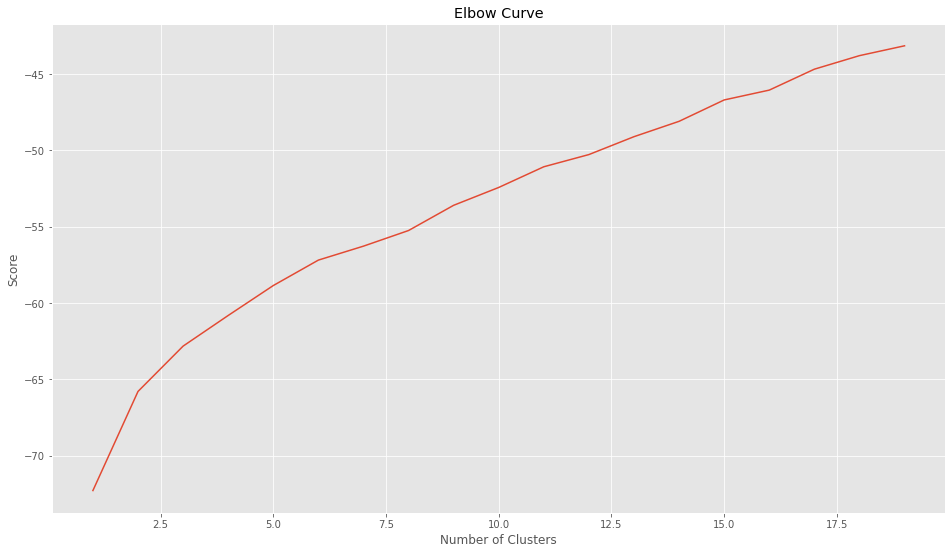

Color


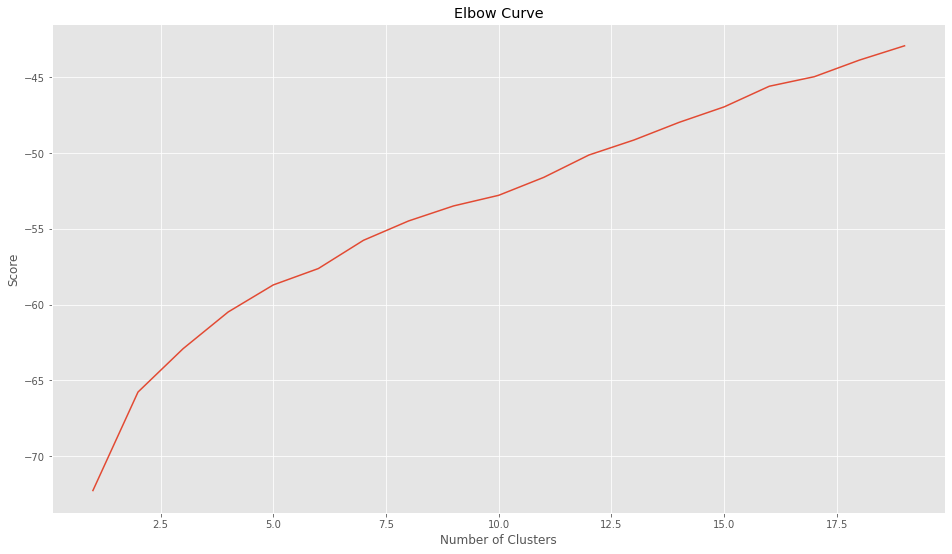

Habitación


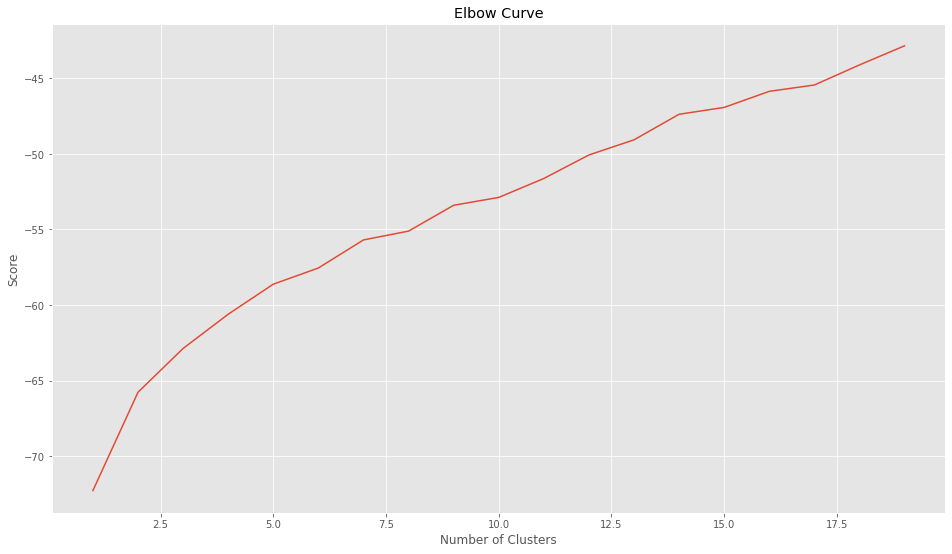

In [15]:
for cat in cluster_dict.keys():
    print(cat)
    X = get_mat("Material")
    Nc = range(1, 20)
    kmeans = [KMeans(n_clusters=i) for i in Nc]
    score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
    plt.plot(Nc,score)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Score')
    plt.title('Elbow Curve')
    plt.show()

In [52]:
num_clust = dict()
num_clust["Material"] = 5
num_clust["Color"] = 2
num_clust["Habitación"] = 2

In [53]:
refs = dict()
for cat in cluster_dict.keys():
    print(cat)
    X = get_mat("Material")
    kmeans = KMeans(n_clusters=num_clust[cat]).fit(X)
    centroids = kmeans.cluster_centers_
    refs[cat] = centroids

Material
Color
Habitación


In [67]:
from scipy.spatial import distance

def nearest_cat(refs, model, word):
    
    emb = model[word]
    d_min = 9999
    
    for cat in refs.keys():
        
        for cent in refs[cat]:
            
            #d = dot(emb, cent)/(norm(emb)*norm(cent))
            #d = distance.euclidean(emb, cent)
            #d = np.linalg.norm(emb-cent) # minus eucl
            
            print(d)
            
            if (d < d_min):
                
                d_min = d
                final_cat = cat
    
    return final_cat, d_min
    

In [68]:
nearest_cat(refs, model, "comedor")

1.022853474668116
1.0001157640322706
1.1223919158920534
1.153196880211859
1.0251312994945525
1.0592262701077222
1.0025425611221406
1.0535788598039477
1.0069213858636459


('Material', 1.0001157640322706)

In [62]:
refs

{'Material': array([[ 0.01988421,  0.02255263,  0.03016316, ..., -0.00368947,
         -0.01042632, -0.01030526],
        [ 0.01602941,  0.02713529,  0.05294118, ..., -0.01522353,
          0.00554706, -0.03503529],
        [-0.01498261,  0.01776087,  0.04330435, ..., -0.01957826,
         -0.0463    , -0.01562174],
        [ 0.042925  ,  0.05280833,  0.032825  , ..., -0.02806667,
         -0.03564167,  0.010625  ],
        [ 0.01195217,  0.0237    ,  0.03803043, ...,  0.00573913,
         -0.06568696,  0.0168913 ]]),
 'Color': array([[-2.33421037e-03,  1.85789473e-02,  4.74736839e-02,
         -3.58789471e-02,  4.65499995e-02, -8.39210533e-03,
          3.52578947e-02, -3.71447370e-02,  8.68157892e-02,
          3.31052617e-03,  3.73815788e-02, -1.81236844e-02,
          7.19815788e-02,  4.38421046e-03, -8.26315915e-04,
         -1.02763161e-02, -1.49526316e-02,  7.41578941e-03,
          2.35789456e-03, -4.06052632e-02,  1.57447371e-02,
         -4.07631580e-02, -5.67894722e-03,  4.2

# K NEAREST 

In [70]:
tup = []
y = []
c = 0
for k in cluster_dict.keys():
    print(k)
    for word in cluster_dict[k]:
        #print(word)
        if word.lower() in model:
            emb = tuple(model[word.lower()])
            tup.append(emb)
            y.append(c)
        else:
            print("NOT FOUND")
    c += 1

Material
NOT FOUND
NOT FOUND
Color
Habitación


In [73]:
arr = np.arange(len(y))
np.random.shuffle(arr)

In [75]:
X = []
Y = []
for indx in arr:
    X.append(np.array(tup[indx]))
    Y.append(y[indx])
X = np.array(X)
Y = np.array(Y)

In [101]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3) # 70% training and 30% test

In [110]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [111]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


# Data Augmentation

In [143]:
five_nearest = dict()
for cat in cluster_dict.keys():
    for elem in cluster_dict[cat]:
        if elem.lower() in model:
            five_nearest[elem.lower()] = []

In [144]:
from tqdm import tqdm

In [146]:
for word in tqdm(list(model.key_to_index.keys())):
    w = model[word]
    for cat in cluster_dict.keys():
        for elem in cluster_dict[cat]:
            if word != elem:
                if elem in model:
                    emb = model[elem.lower()]
                    dist =  dot(emb, w)/(norm(emb)*norm(w))
                    five_nearest[elem.lower()].append((word, dist))
                    if (len(five_nearest[elem.lower()])) > 10:
                        five_nearest[elem.lower()].sort(key=lambda x:x[1])
                        five_nearest[elem.lower()] = five_nearest[elem.lower()][1:]

100%|██████████| 985667/985667 [13:58<00:00, 1176.16it/s]


In [148]:
len(five_nearest)

122

In [147]:
five_nearest

{'viña': [('quilpué', 0.54391783),
  ('quilpué»', 0.5474483),
  ('viñamarina', 0.548094),
  ('viña»', 0.554211),
  ('viñas', 0.5542559),
  ('reñaca', 0.5545001),
  ('viñamarino', 0.566461),
  ('mar/valparaíso/quilpué', 0.57156765),
  ('olmué', 0.5732536),
  ('valparaíso/viña', 0.65691066)],
 'maciza': [('troncocónicos', 0.60264397),
  ('troncocónicas', 0.6036387),
  ('troncónica', 0.6051817),
  ('semicilíndrica', 0.60745263),
  ('troncopiramidal', 0.6125565),
  ('troncocónico', 0.65213233),
  ('troncocónica', 0.66915154),
  ('macizado', 0.71355706),
  ('macizas', 0.76172036),
  ('macizada', 0.77839017)],
 'poliuretano': [],
 'polietileno': [],
 'zea': [],
 'albizia': [],
 'madera': [('ebanistería', 0.62004316),
  ('enchapados', 0.6277273),
  ('palmadera', 0.63029414),
  ('enchapado', 0.64429766),
  ('maderamen', 0.6613706),
  ('madera»', 0.6739848),
  ('maderada', 0.6792779),
  ('madera,', 0.7411423),
  ('maderas', 0.7719377),
  ('maderaje', 0.7736996)],
 'latón': [],
 'cemento': [('ce

In [60]:
five_nearest = {'viña': [('quilpué', 0.54391783),
  ('quilpué»', 0.5474483),
  ('viñamarina', 0.548094),
  ('viña»', 0.554211),
  ('viñas', 0.5542559),
  ('reñaca', 0.5545001),
  ('viñamarino', 0.566461),
  ('mar/valparaíso/quilpué', 0.57156765),
  ('olmué', 0.5732536),
  ('valparaíso/viña', 0.65691066)],
 'maciza': [('troncocónicos', 0.60264397),
  ('troncocónicas', 0.6036387),
  ('troncónica', 0.6051817),
  ('semicilíndrica', 0.60745263),
  ('troncopiramidal', 0.6125565),
  ('troncocónico', 0.65213233),
  ('troncocónica', 0.66915154),
  ('macizado', 0.71355706),
  ('macizas', 0.76172036),
  ('macizada', 0.77839017)],
 'poliuretano': [],
 'polietileno': [],
 'zea': [],
 'albizia': [],
 'madera': [('ebanistería', 0.62004316),
  ('enchapados', 0.6277273),
  ('palmadera', 0.63029414),
  ('enchapado', 0.64429766),
  ('maderamen', 0.6613706),
  ('madera»', 0.6739848),
  ('maderada', 0.6792779),
  ('madera,', 0.7411423),
  ('maderas', 0.7719377),
  ('maderaje', 0.7736996)],
 'latón': [],
 'cemento': [('cementó', 0.6989005),
  ('hormigón', 0.7098711),
  ('cementario', 0.71758366),
  ('cal/cemento', 0.71822304),
  ('ferrocemento', 0.7225414),
  ('cemento»', 0.7332263),
  ('fibrocemento', 0.740252),
  ('cementar', 0.74356157),
  ('cementa', 0.74501455),
  ('cementos', 0.81285495)],
 'poliestireno': [],
 'naturales': [('connaturales', 0.65012395),
  ('naturalez', 0.6696552),
  ('seminaturales', 0.67884827),
  ('natural', 0.67945576),
  ('natural,', 0.6951108),
  ('naturales—', 0.7285186),
  ('naturales»', 0.7728663),
  ('naturalesa', 0.77885455),
  ('naturales,', 0.81303877),
  ('naturales…', 0.83697397)],
 'sintético': [('polisintético', 0.7066096),
  ('semisintética', 0.72225493),
  ('sintéticos»', 0.75218624),
  ('semisintético', 0.7634386),
  ('sintéticamente', 0.7918292),
  ('sintéticas', 0.8102702),
  ('sintética»', 0.813271),
  ('sintéticos', 0.81998724),
  ('sintético»', 0.8815981),
  ('sintética', 0.904608)],
 'melamina': [],
 'nylon': [],
 'resina': [],
 'partículas': [('partícular', 0.8162624),
  ('biopartículas', 0.8247785),
  ('cuasipartículas', 0.8405031),
  ('antipartículas', 0.8418437),
  ('micropartículas', 0.84854937),
  ('macropartículas', 0.84856755),
  ('astropartículas', 0.8497417),
  ('partículares', 0.8515727),
  ('partículas»', 0.8817432),
  ('spartículas', 0.89440036)],
 'tablero': [('pasapiezas', 0.57601666),
  ('ajedrez', 0.58025706),
  ('juego,', 0.5805119),
  ('juego', 0.6096222),
  ('tableras', 0.64042616),
  ('cablero', 0.65030414),
  ('tabler', 0.6777238),
  ('tablero»', 0.7471751),
  ('tableroot', 0.7517202),
  ('tableros', 0.7689135)],
 'vaca': [('‘oveja', 0.5653775),
  ('ternero', 0.59066665),
  ('ubre', 0.59206635),
  ('leche', 0.60380274),
  ('gallina', 0.6130362),
  ('cerdo', 0.6142319),
  ('carnero', 0.629055),
  ('vacas', 0.6316502),
  ('cabra', 0.64199275),
  ('oveja', 0.64769816)],
 'manufacturada': [('manufacturó', 0.82410103),
  ('manufacturar', 0.8247437),
  ('manufacturarse', 0.82997763),
  ('manufactura', 0.83462125),
  ('manufacturaba', 0.8461943),
  ('manufacturador', 0.84925413),
  ('manufacturados', 0.8692631),
  ('manufacturadora', 0.877407),
  ('manufacturadas', 0.8999456),
  ('manufacturado', 0.92300326)],
 'fimbristylis': [],
 'haya': [('ha', 0.5752962),
  ('hubiere', 0.5788746),
  ('¿hubiera', 0.58104),
  ('haber', 0.58118683),
  ('hubieras', 0.60413295),
  ('habrá', 0.60771126),
  ('hayamos', 0.60958415),
  ('hubiese', 0.6166556),
  ('hubiera', 0.6552529),
  ('hayan', 0.67137784)],
 'ratán': [],
 'nogal': [('nogales', 0.5524694),
  ('nogalera', 0.56971824),
  ('nogalar', 0.57564276),
  ('ébano', 0.5764201),
  ('ñogal', 0.5816711),
  ('nogalito', 0.60473156),
  ('ciprés', 0.608725),
  ('roble', 0.6276413),
  ('caoba', 0.63113153),
  ('cedro', 0.68509835)],
 'sintética': [('semisintético', 0.6826521),
  ('polisintética', 0.6978535),
  ('sintéticos»', 0.74350256),
  ('semisintética', 0.74723715),
  ('sintéticamente', 0.79712874),
  ('sintéticos', 0.80601645),
  ('sintético»', 0.8233549),
  ('sintéticas', 0.8403905),
  ('sintética»', 0.87338585),
  ('sintético', 0.904608)],
 'betula': [],
 'cabra': [('cabracho', 0.57167745),
  ('cabrit', 0.5842471),
  ('cabrais', 0.59305865),
  ('cabrahigo', 0.5943072),
  ('carnero', 0.5956771),
  ('cabras', 0.61149585),
  ('cabrito', 0.61632615),
  ('cabracán', 0.62300706),
  ('vaca', 0.64199275),
  ('oveja', 0.64561135)],
 'cerámico': [],
 'piedra': [('piedrancha', 0.6226354),
  ('labrada', 0.6356292),
  ('‘piedra', 0.6488254),
  ('piedra»', 0.6584062),
  ('piedradura', 0.6630252),
  ('arenisca', 0.6635126),
  ('caliza', 0.669152),
  ('piedras', 0.68192273),
  ('granito', 0.6869306),
  ('piedra,', 0.7017998)],
 'papel': [],
 'eps': [],
 'globulosa': [('globulospinella', 0.77458864),
  ('globularis', 0.7800083),
  ('globulotuboides', 0.7877038),
  ('tubulosa', 0.7921194),
  ('globulos', 0.81848985),
  ('globulotuba', 0.8186441),
  ('globula', 0.8316642),
  ('globulosas', 0.83832204),
  ('globulo', 0.83967054),
  ('globuloso', 0.8497471)],
 'contrachapado': [],
 'aluminio': [],
 'tejer': [('trenzar', 0.62371624),
  ('confeccionarse', 0.63068485),
  ('tejida', 0.6310895),
  ('bordar', 0.63232315),
  ('coser', 0.63497025),
  ('hilar', 0.6569401),
  ('tejerse', 0.659019),
  ('telar', 0.67675394),
  ('tejerlo', 0.6955085),
  ('entretejer', 0.69557196)],
 'roble': [('robledal', 0.5726474),
  ('liquidámbar', 0.57508385),
  ('quercus', 0.57657284),
  ('roblería', 0.5765821),
  ('encina', 0.5869356),
  ('cedro', 0.5872724),
  ('encino', 0.5990381),
  ('pino', 0.6054475),
  ('nogal', 0.6276413),
  ('‘roble', 0.6333244)],
 'algodón': [],
 'rafia': [],
 'tejido': [],
 'pino': [('cedro', 0.60211915),
  ('encinas', 0.604897),
  ('roble', 0.6054475),
  ('encina', 0.6067245),
  ('resinero', 0.6219841),
  ('abeto', 0.62522376),
  ('pinos', 0.63941133),
  ('piñonero', 0.6427276),
  ('encino', 0.64825153),
  ('pinus', 0.67258835)],
 'tapizado': [],
 'lino': [],
 'caña': [],
 'saman': [],
 'alba': [('vitalba', 0.45961782),
  ('cayetana', 0.46081516),
  ('castañar', 0.4628655),
  ('albata', 0.4731263),
  ('ontalba', 0.47722757),
  ('roseoalba', 0.48074916),
  ('ficalba', 0.48726258),
  ('estremera', 0.4923909),
  ('alba,', 0.5120065),
  ('tormes', 0.5386016)],
 'fresno': [('fresnu', 0.60234743),
  ('fresnos', 0.64529103),
  ('fuentelfresno', 0.65773576),
  ('valdefresno', 0.68211186),
  ('fresnosa', 0.69163597),
  ('fresno»', 0.7025736),
  ('arroyofresno', 0.71282864),
  ('riofresno', 0.7179924),
  ('presno', 0.7767286),
  ('resno', 0.80046487)],
 'azedarach': [('terebinthifolius', 0.5692106),
  ('fragarach', 0.5739149),
  ('chamaebuxus', 0.5743451),
  ('datilera', 0.57662374),
  ('azadirachta', 0.5773383),
  ('koelreuteria', 0.5798602),
  ('melia', 0.6035512),
  ('darach', 0.6078497),
  ('azederach', 0.6908382),
  ('azeda', 0.7009814)],
 'arce': [('arceón', 0.5120119),
  ('cornejo', 0.51280457),
  ('arceo', 0.51298285),
  ('maples', 0.51410216),
  ('pino', 0.51487786),
  ('castañon', 0.5189042),
  ('acer', 0.5215801),
  ('avellano', 0.533485),
  ('arces', 0.54248095),
  ('robles', 0.5432893)],
 'acacia': [('commiphora', 0.61331207),
  ('acaciella', 0.6181171),
  ('~acacia~', 0.63432926),
  ('pseudacacia', 0.6587245),
  ('acaciae', 0.65909994),
  ('arracacia', 0.70165086),
  ('acaciano', 0.70715),
  ('pseudoacacia', 0.7176361),
  ('acacias', 0.7291738),
  ('nothacacia', 0.75922984)],
 'búfalo': [('bisonte', 0.5478375),
  ('reno', 0.54967433),
  ('antílope', 0.56535697),
  ('búfalas', 0.6013656),
  ('búfala', 0.6556913),
  ('búffalo', 0.65978336),
  ('buffalo', 0.66121495),
  ('búfalos', 0.7404352),
  ('búfalo»', 0.79041296),
  ('‘búfalo', 0.8370725)],
 'costata': [('spinicostata', 0.85059464),
  ('alticostata', 0.85664356),
  ('microcostata', 0.85828465),
  ('unicostata', 0.859792),
  ('tenuicostata', 0.8630677),
  ('octocostata', 0.86315346),
  ('rubrocostata', 0.86479795),
  ('subcostata', 0.86845386),
  ('acostata', 0.8705834),
  ('bicostata', 0.8964956)],
 'radiata': [('tuberifera', 0.63311225),
  ('catenulata', 0.6369),
  ('radiat', 0.6631408),
  ('breviradiata', 0.71226263),
  ('quinqueradiata', 0.7460325),
  ('pauciradiata', 0.7676494),
  ('multiradiata', 0.7716311),
  ('quadriradiata', 0.79807734),
  ('luteoradiata', 0.7985501),
  ('triradiata', 0.81418175)],
 'lato': [('camphorosmoideae', 0.50025564),
  ('bangiaceae', 0.5004689),
  ('equisetaceae', 0.5012836),
  ('cladonia', 0.5021669),
  ('altingiaceae', 0.50223356),
  ('derbesiaceae', 0.5032773),
  ('millettieae', 0.50742584),
  ('diplaziopsidaceae', 0.5143541),
  ('stricto', 0.53864807),
  ('sensu', 0.6394489)],
 'plástico': [],
 'lana': [],
 'templado': [('semihúmedo', 0.75337213),
  ('semicálido', 0.7681144),
  ('húmedo', 0.7764181),
  ('perhúmedo', 0.78259224),
  ('clima', 0.7835917),
  ('subtemplado', 0.79042184),
  ('cálido', 0.79140407),
  ('templado»', 0.79219085),
  ('templado/mesotermal', 0.8089865),
  ('templados', 0.81607753)],
 'acero': [],
 'mármol': [],
 'polipropileno': [],
 'aucoumea': [],
 'cuerda': [],
 'vinilo': [('vinyl', 0.67185754),
  ('pulgadasvinilo', 0.70857483),
  ('casete', 0.7100564),
  ('viniles', 0.71336704),
  ('viniléster', 0.7510841),
  ('vinilocasetedisco', 0.76272345),
  ('vinilodisco', 0.7679918),
  ('vinilo»', 0.79519945),
  ('vinilos', 0.8264463),
  ('vinil', 0.8277749)],
 'galvanizado': [('galvanizaron', 0.7444132),
  ('galvanized', 0.7462859),
  ('galvanizar', 0.7692419),
  ('galvanizadora', 0.7732851),
  ('galvanize', 0.7876107),
  ('galvanizó', 0.7983175),
  ('galvanizadas', 0.81983215),
  ('galvaniza', 0.8301228),
  ('galvanizados', 0.8514605),
  ('galvanizada', 0.90929365)],
 'hevea': [],
 'caoba': [('madera', 0.60405487),
  ('maderas', 0.6120067),
  ('ébano', 0.6206119),
  ('nogal', 0.63113153),
  ('caobilla', 0.6432739),
  ('caobania', 0.6673678),
  ('caob', 0.71879154),
  ('cedro', 0.72266936),
  ('caobo', 0.73745),
  ('caobas', 0.8143264)],
 'terrazo': [],
 'cerezo': [('berezo', 0.5614321),
  ('cereza', 0.56693214),
  ('ciruelos', 0.5840031),
  ('ciruelo', 0.5982437),
  ('manzano', 0.6003555),
  ('cerezos', 0.60440785),
  ('arrocerezo', 0.61564296),
  ('riocerezo', 0.6275226),
  ('cerezeda', 0.6491128),
  ('cerezo»', 0.75758743)],
 'regia': [('imperiali', 0.47677305),
  ('regias', 0.47709176),
  ('vinegia', 0.48557284),
  ('imperiale', 0.48618078),
  ('regiane', 0.50104123),
  ('regiae', 0.5044072),
  ('egregia', 0.5249477),
  ('regia»', 0.5339695),
  ('regiamente', 0.5463626),
  ('regiao', 0.585418)],
 'mangium': [],
 'triplochiton': [],
 'abs': [],
 'elastica': [('elastigirl', 0.66136986),
  ('elasto', 0.66896427),
  ('elastix', 0.7020327),
  ('plastica', 0.717231),
  ('elastic', 0.74363536),
  ('agelastica', 0.7513081),
  ('elasticina', 0.7729158),
  ('elasti', 0.7804973),
  ('elasticas', 0.82977414),
  ('elastico', 0.85138273)],
 'poliéster': [],
 'acrílicas': [('barnizadas', 0.6378655),
  ('acrilatos', 0.64289355),
  ('encáusticas', 0.6461931),
  ('poliéster', 0.64621055),
  ('encoladas', 0.64819103),
  ('poliésteres', 0.65261686),
  ('poliacrílico', 0.65525395),
  ('acrílico', 0.78972363),
  ('acrílica', 0.84086996),
  ('acrílicos', 0.86270833)],
 'metal': [],
 'cunninghamia': [],
 'samanea': [],
 'teca': [('ditecas', 0.49371785),
  ('endosperma', 0.49912596),
  ('exocarpio', 0.50218296),
  ('polispermo', 0.50705695),
  ('tecajete', 0.5084419),
  ('mopane', 0.51997197),
  ('tecana', 0.5303616),
  ('polisperma', 0.53762895),
  ('epiteca', 0.57782966),
  ('tecas', 0.60141087)],
 'piel': [],
 'tectona': [],
 'hierro': [('hierra', 0.6900447),
  ('hierrocruz', 0.70029736),
  ('hierros', 0.7133952),
  ('hierro\xa0', 0.7149045),
  ('hierro»', 0.73215944),
  ('hierro\xa0el', 0.7436724),
  ('hierro/', 0.7444764),
  ('hierro—', 0.75035375),
  ('hierro\xa0con', 0.77947783),
  ('hierro,', 0.80689937)],
 'espuma': [],
 'pinaster': [('coscojas', 0.62533545),
  ('juniperus', 0.62586015),
  ('laricio', 0.6303601),
  ('quejigo', 0.63572425),
  ('tajinaste', 0.6358481),
  ('tajinastes', 0.6441768),
  ('pinea', 0.664996),
  ('echinaster', 0.69915056),
  ('pinus', 0.7058302),
  ('lupinaster', 0.82212585)],
 'felpa': [],
 'melia': [],
 'marinas': [('oceánicos', 0.62513816),
  ('pelágicas', 0.627749),
  ('intermareales', 0.63773006),
  ('oceánicas', 0.64529186),
  ('mareales', 0.64700025),
  ('submarinas', 0.681085),
  ('estuarinas', 0.6852559),
  ('marinos', 0.6878237),
  ('marinas»', 0.7131309),
  ('marinas—', 0.72785705)],
 'fraxinus': [],
 'recicladas': [('reciclajes', 0.74684924),
  ('recicladoras', 0.75833875),
  ('reciclando', 0.76046675),
  ('recicla', 0.7615947),
  ('reciclaban', 0.7626934),
  ('reciclables', 0.8012926),
  ('reciclado', 0.81541),
  ('reciclan', 0.8267589),
  ('reciclada', 0.82899153),
  ('reciclados', 0.862285)],
 'yute': [],
 'policloruro': [],
 'mays': [('maysilee', 0.48344332),
  ('pitcher', 0.48429328),
  ('tabacum', 0.48597968),
  ('capshaw', 0.49294725),
  ('maíz', 0.4976009),
  ('pinkston', 0.50664586),
  ('umays', 0.5071139),
  ('jayma', 0.52684677),
  ('zea', 0.5641223),
  ('mayson', 0.56981623)],
 'ulmus': [],
 'media': [('vmedia', 0.52370304),
  ('promedio', 0.531088),
  ('mediajo', 0.5369985),
  ('xmedia', 0.5370618),
  ('mediana', 0.5400482),
  ('#media', 0.54623),
  ('media,', 0.5639889),
  ('dmedia', 0.570907),
  ('media®', 0.6027938),
  ('media#baja', 0.61555064)],
 'tela': [],
 'hormigon': [('hormigonados', 0.74715793),
  ('hormigos', 0.76745504),
  ('hormigoneras', 0.79392374),
  ('hormigonada', 0.799249),
  ('hormigonado', 0.81973743),
  ('hormigo', 0.82976043),
  ('hormigonando', 0.8301599),
  ('hormigones', 0.84735),
  ('hormigonera', 0.851002),
  ('hormigonar', 0.8662707)],
 'azul': [],
 'natural': [],
 'multicolor': [],
 'negro': [],
 'mostaza': [],
 'marrón': [],
 'gris': [],
 'beige': [],
 'blanco': [],
 'plateado': [],
 'amarillo': [],
 'rosa': [],
 'lila': [],
 'naranja': [],
 'rojo': [],
 'transparente': [],
 'turquesa': [],
 'cobre': [],
 'verde': [],
 'dorado': [],
 'comedor': [],
 'terraza': [('aterrazados', 0.6152835),
  ('escalinata', 0.61800534),
  ('aterrazamiento', 0.6211753),
  ('azotea', 0.62656975),
  ('berraza', 0.67986673),
  ('aterrazado', 0.69976604),
  ('terrazas', 0.7089755),
  ('aterrazada', 0.73134625),
  ('terrazado', 0.74283975),
  ('terrazada', 0.7777989)],
 'dormitorio': [],
 'salón': [],
 'recibidor': [],
 'trabajo': [('trabajare', 0.65711546),
  ('trabajazo', 0.6575111),
  ('trabajar', 0.6616763),
  ('¿trabajo', 0.6643325),
  ('trabajò', 0.69584185),
  ('trabajo»', 0.705437),
  ('trabajor', 0.7384868),
  ('trabajo\xa0', 0.7449772),
  ('trabajo,', 0.7528501),
  ('trabajo…', 0.7942616)],
 'cocina': [],
 'baño': []}

In [61]:
augmented_cluster_dict = cluster_dict.copy()
for cat in augmented_cluster_dict.keys():
    for elem in augmented_cluster_dict[cat]:
        if elem.lower() in five_nearest:
            l = [e[0] for e in five_nearest[elem.lower()]]
            print(set(l))
            augmented_cluster_dict[cat] = augmented_cluster_dict[cat].union(set(l))

set()
set()
{'encina', 'encino', 'roble', 'pinus', 'abeto', 'resinero', 'pinos', 'encinas', 'cedro', 'piñonero'}
set()
{'‘roble', 'roblería', 'encina', 'encino', 'pino', 'liquidámbar', 'robledal', 'nogal', 'quercus', 'cedro'}
{'hormigonar', 'hormigonados', 'hormigonando', 'hormigo', 'hormigos', 'hormigones', 'hormigonera', 'hormigonada', 'hormigoneras', 'hormigonado'}
set()
{'maíz', 'pitcher', 'zea', 'mayson', 'jayma', 'tabacum', 'umays', 'capshaw', 'pinkston', 'maysilee'}
{'gallina', 'cabra', 'vacas', 'ubre', 'oveja', 'ternero', 'leche', '‘oveja', 'cerdo', 'carnero'}
set()
{'regiane', 'imperiali', 'imperiale', 'regiae', 'regiao', 'vinegia', 'regiamente', 'egregia', 'regias', 'regia»'}
{'nogalera', 'ñogal', 'nogalito', 'nogales', 'ciprés', 'roble', 'caoba', 'nogalar', 'ébano', 'cedro'}
{'haber', 'ha', 'hubieras', '¿hubiera', 'hayan', 'hubiese', 'hubiere', 'hubiera', 'habrá', 'hayamos'}
set()
set()
{'quinqueradiata', 'breviradiata', 'catenulata', 'radiat', 'pauciradiata', 'triradiata', 

In [62]:
augmented_cluster_dict

{'Material': {'#media',
  'abeto',
  'abs',
  'acacia',
  'acaciae',
  'acaciano',
  'acacias',
  'acaciella',
  'acer',
  'acero',
  'acostata',
  'acrilatos',
  'acrílica',
  'acrílicas',
  'acrílico',
  'acrílicos',
  'agelastica',
  'ajedrez',
  'alba',
  'alba,',
  'albata',
  'albizia',
  'algodón',
  'alticostata',
  'altingiaceae',
  'aluminio',
  'antipartículas',
  'antílope',
  'arce',
  'arceo',
  'arces',
  'arceón',
  'arenisca',
  'arracacia',
  'arrocerezo',
  'arroyofresno',
  'astropartículas',
  'aucoumea',
  'avellano',
  'azadirachta',
  'azeda',
  'azedarach',
  'azederach',
  'bangiaceae',
  'barnizadas',
  'berezo',
  'betula',
  'bicostata',
  'biopartículas',
  'bisonte',
  'bordar',
  'breviradiata',
  'buffalo',
  'búfala',
  'búfalas',
  'búfalo',
  'búfalos',
  'búfalo»',
  'búffalo',
  'cablero',
  'cabra',
  'cabracho',
  'cabracán',
  'cabrahigo',
  'cabrais',
  'cabras',
  'cabrit',
  'cabrito',
  'cal/cemento',
  'caliza',
  'camphorosmoideae',
  'cao

In [63]:
augmented_cluster_dict2 = augmented_cluster_dict.copy()
for cat in ["Estilo", "Mueble"]:
    for elem in augmented_cluster_dict2[cat]:
        if elem.lower() in five_nearest2:
            l = [e[0] for e in five_nearest2[elem.lower()]]
            augmented_cluster_dict2[cat] = augmented_cluster_dict2[cat].union(set(l))

In [64]:
augmented_cluster_dict2

{'Material': {'#media',
  'abeto',
  'abs',
  'acacia',
  'acaciae',
  'acaciano',
  'acacias',
  'acaciella',
  'acer',
  'acero',
  'acostata',
  'acrilatos',
  'acrílica',
  'acrílicas',
  'acrílico',
  'acrílicos',
  'agelastica',
  'ajedrez',
  'alba',
  'alba,',
  'albata',
  'albizia',
  'algodón',
  'alticostata',
  'altingiaceae',
  'aluminio',
  'antipartículas',
  'antílope',
  'arce',
  'arceo',
  'arces',
  'arceón',
  'arenisca',
  'arracacia',
  'arrocerezo',
  'arroyofresno',
  'astropartículas',
  'aucoumea',
  'avellano',
  'azadirachta',
  'azeda',
  'azedarach',
  'azederach',
  'bangiaceae',
  'barnizadas',
  'berezo',
  'betula',
  'bicostata',
  'biopartículas',
  'bisonte',
  'bordar',
  'breviradiata',
  'buffalo',
  'búfala',
  'búfalas',
  'búfalo',
  'búfalos',
  'búfalo»',
  'búffalo',
  'cablero',
  'cabra',
  'cabracho',
  'cabracán',
  'cabrahigo',
  'cabrais',
  'cabras',
  'cabrit',
  'cabrito',
  'cal/cemento',
  'caliza',
  'camphorosmoideae',
  'cao

# Labeling 

In [65]:
none_category = np.array(list(model.key_to_index.keys()))
np.random.shuffle(none_category)
none_category = none_category[:3500]

In [66]:
wrds = []
embs = []
y = []

for k in augmented_cluster_dict2.keys():
    for word in augmented_cluster_dict2[k]:
        #print(word)
        if word.lower() in model:
            wrds.append(word.lower())
            embs.append(model[word.lower()])
            y.append(k)
        else:
            print("NOT FOUND")
for j in none_category:
    wrds.append(j)
    embs.append(model[j])
    y.append("not_an_attr")

NOT FOUND
NOT FOUND


In [67]:
len(y)

4319

In [68]:
len(embs)

4319

# KNN

In [69]:
arr = np.arange(len(y))
np.random.shuffle(arr)

In [70]:
X = []
Y = []
for indx in arr:
    X.append(np.array(embs[indx]))
    Y.append(y[indx])
X = np.array(X)
Y = np.array(Y)

In [71]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25) # 70% training and 30% test

In [72]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier
import pickle
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)


import timeit
start = timeit.default_timer()
#Train the model using the training sets
knn.fit(X_train, y_train)
stop = timeit.default_timer()
print('Time: ', stop - start) 


# save the model to disk
filename = 'model_v3.sav'
pickle.dump(knn, open(filename, 'wb'))


#Predict the response for test dataset
start = timeit.default_timer()
y_pred = knn.predict(X_test)
stop = timeit.default_timer()
print('Time: ', stop - start) 

Time:  0.0017817180000747612
Time:  0.16545053799973175


In [73]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9324074074074075


In [74]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#print("F1:",metrics.f1_score(y_test, y_pred))
#print("Recall:",metrics.recall_score(y_test, y_pred))
#print("Precision:",metrics.precision_score(y_test, y_pred))

Accuracy: 0.9324074074074075


# Load and test

In [75]:
import pickle
# load the model from disk
loaded_model = pickle.load(open("model_v3.sav", 'rb'))

In [76]:
word = "silla"

In [77]:
result = loaded_model.predict(np.array([model[word]]))
print(result)

['Mueble']


In [78]:
words = []
x = []
for k in five_nearest.keys():
    words.append(k)
    x.append(model[k])
    for j in five_nearest[k]:
        x.append(model[j[0]])
        words.append(j[0])

result = loaded_model.predict(x)

In [79]:
for i,j in zip(words, result):
    print(i, ".........",j)

viña ......... Material
quilpué ......... Material
quilpué» ......... Material
viñamarina ......... Material
viña» ......... not_an_attr
viñas ......... Material
reñaca ......... Material
viñamarino ......... Material
mar/valparaíso/quilpué ......... Material
olmué ......... Material
valparaíso/viña ......... Material
maciza ......... Material
troncocónicos ......... Material
troncocónicas ......... Material
troncónica ......... Material
semicilíndrica ......... Material
troncopiramidal ......... Material
troncocónico ......... Material
troncocónica ......... Material
macizado ......... Material
macizas ......... Material
macizada ......... Material
poliuretano ......... Material
polietileno ......... Material
zea ......... not_an_attr
albizia ......... not_an_attr
madera ......... Material
ebanistería ......... Material
enchapados ......... Material
palmadera ......... Material
enchapado ......... Material
maderamen ......... Material
madera» ......... Material
maderada ......... Mate

In [80]:
words = []
x = []
for k in cluster_dict.keys():
    words.append(k)
    x.append(model[k.lower()])
    for j in cluster_dict[k]:
        if j in model:
            x.append(model[j])
            words.append(j)

result = loaded_model.predict(x)

In [81]:
classification = dict()
for i,j in zip(words, result):
    if j not in classification.keys():
        classification[j] = []
    classification[j].append(i)

In [82]:
for k in classification.keys():
    print(k)
    print()
    print(classification[k])
    print()
    

Material

['Material', 'lino', 'pino', 'tectona', 'roble', 'hormigon', 'mármol', 'mays', 'vaca', 'regia', 'nogal', 'haya', 'polipropileno', 'melia', 'radiata', 'cabra', 'tejido', 'búfalo', 'cunninghamia', 'templado', 'caña', 'poliestireno', 'poliuretano', 'caoba', 'partículas', 'latón', 'cerezo', 'lato', 'acacia', 'policloruro', 'recicladas', 'betula', 'piel', 'marinas', 'arce', 'poliéster', 'pinaster', 'acero', 'cerámico', 'polietileno', 'cemento', 'aluminio', 'terrazo', 'sintética', 'rafia', 'hevea', 'madera', 'acrílicas', 'viña', 'nylon', 'costata', 'cuerda', 'media', 'abs', 'lana', 'hierro', 'azedarach', 'fresno', 'elastica', 'plástico', 'globulosa', 'fraxinus', 'contrachapado', 'sintético', 'naturales', 'manufacturada', 'tejer', 'yute', 'maciza', 'metal', 'ratán', 'piedra', 'teca', 'ulmus', 'galvanizado', 'resina', 'vinilo', 'tablero', 'alba', 'espuma', 'algodón', 'cobre', 'natural']

not_an_attr

['aucoumea', 'eps', 'zea', 'mangium', 'fimbristylis', 'albizia', 'samanea', 'melamin

In [89]:
known = dict()
for k in cluster_dict.keys():
    for j in cluster_dict[k]:
        known[j] = k

In [118]:
def get_attr_cat(word, model, knn, known):
    
    if isinstance(word, str):
        if word in known.keys():
            return known[word]
        if word in model:
            prediction = knn.predict(np.array([model[word]]))
            return prediction[0]
        return "not_an_attr"
    
    if isinstance(word, list):
        result = []
        for w in word:
            if w in known.keys():
                result.append(known[w])
            elif w in model:
                prediction = knn.predict(np.array([model[w]]))
                result.append(prediction[0])
            else:
                result.append("not_an_attr")
        return result
    
    else:
        raise TypeError("word should be str or list")
    
    return "No result returned"

In [117]:
word = ["plastico","pasillo"]
get_attr_cat(word, model, loaded_model, known)

['Material', 'Habitación']

In [120]:
type(knn)

sklearn.neighbors._classification.KNeighborsClassifier

In [121]:
print(known)

{'fraxinus': 'Material', 'radiata': 'Material', 'acero': 'Material', 'acrílicas': 'Material', 'caoba': 'Material', 'polipropileno': 'Material', 'mays': 'Material', 'metal': 'Material', 'templado': 'Material', 'felpa': 'Material', 'fimbristylis': 'Material', 'melia': 'Material', 'pino': 'Material', 'triplochiton': 'Material', 'partículas': 'Material', 'abs': 'Material', 'ulmus': 'Material', 'vaca': 'Material', 'pinaster': 'Material', 'maciza': 'Material', 'eps': 'Material', 'samanea': 'Material', 'sintético': 'Material', 'hormigon': 'Material', 'cuerda': 'Material', 'elastica': 'Material', 'textileno': 'Material', 'manufacturada': 'Material', 'ratán': 'Material', 'arce': 'Material', 'cemento': 'Material', 'galvanizado': 'Material', 'sintética': 'Material', 'regia': 'Material', 'aucoumea': 'Material', 'madera': 'Material', 'tela': 'Material', 'tejer': 'Material', 'resina': 'Material', 'betula': 'Material', 'latón': 'Material', 'costata': 'Material', 'terrazo': 'Material', 'nylon': 'Mater

# New cat: Estilo

In [13]:
new_cat = {
    "Estilo":{
        "moderno",
        "clásico",
        "bohemio",
        "industrial",
        "minimalista",
        "vintage",
        "nórdico",
        "escandinavo",
        "náutico",
        "rústico",
        "ecléctico",
        "romántico",
        "oriental"
    },
    'Mueble':{
        "silla",
        "sofa",
        'mesa',
        'taburete',
        'alfombra',
        'hamaca',
        'armario',
        'espejo',
        "sillón",
        "puff",
        "reposapiés",
        "cama",
        "butaca",
        "banco",
        "banqueta",
        "escritorio",
        "tocador",
        "estantería",
        "perchero",
        "armario",
        "encimera",
        "perchero",
        "cojín",
        "cortina",
        "espejo",
        "lámpara",
        "somier"
    }
}

In [14]:
five_nearest2 = dict()
for cat in new_cat.keys():
    for elem in new_cat[cat]:
        if elem.lower() in model:
            five_nearest2[elem.lower()] = []

In [15]:
from tqdm import tqdm

In [16]:
for word in tqdm(list(model.key_to_index.keys())):
    w = model[word]
    for cat in new_cat.keys():
        for elem in new_cat[cat]:
            if word != elem:
                if elem in model:
                    emb = model[elem.lower()]
                    dist =  dot(emb, w)/(norm(emb)*norm(w))
                    five_nearest2[elem.lower()].append((word, dist))
                    if (len(five_nearest2[elem.lower()])) > 10:
                        five_nearest2[elem.lower()].sort(key=lambda x:x[1])
                        five_nearest2[elem.lower()] = five_nearest2[elem.lower()][1:]

100%|██████████| 985667/985667 [09:50<00:00, 1669.01it/s]


In [17]:
len(five_nearest2)

37

In [53]:
for key in five_nearest2.keys():
    if key in list(five_nearest2.keys())[13:]:
        five_nearest2[key] = five_nearest2[key][:5]

In [54]:
five_nearest2

{'moderno': [('contemporáneo—', 0.6011769),
  ('posmoderno', 0.63196576),
  ('neomoderno', 0.6337456),
  ('moderna', 0.64914304),
  ('ultramoderno', 0.6594756),
  ('contemporáneo', 0.6687181),
  ('premoderno', 0.66966),
  ('moderno/', 0.70175886),
  ('moderno»', 0.713637),
  ('moderno,', 0.79032797)],
 'vintage': [('wantage', 0.49995774),
  ('bookland', 0.5032999),
  ('vinta', 0.50512123),
  ('scrapbooking', 0.51235193),
  ('vintas', 0.51280606),
  ('tintagel', 0.5146939),
  ('custom', 0.5222954),
  ('montage', 0.5417167),
  ('vintagesynth', 0.73548365),
  ('vintages', 0.84633154)],
 'minimalista': [('animalista', 0.6973701),
  ('minimalists', 0.74522614),
  ('minimalistas»', 0.7479122),
  ('minimalism', 0.7559604),
  ('minimalismos', 0.7709107),
  ('minimalist', 0.8000624),
  ('minimalistas', 0.80243564),
  ('posminimalismo', 0.8116183),
  ('minimalista»', 0.8780213),
  ('minimalismo', 0.88807774)],
 'escandinavo': [('nórdicos', 0.7220861),
  ('escandinavística', 0.7342478),
  ('nórdi

In [19]:
known = dict()
for k in cluster_dict.keys():
    for j in cluster_dict[k]:
        known[j] = k

In [20]:
known

{'aucoumea': 'Material',
 'lino': 'Material',
 'pino': 'Material',
 'tectona': 'Material',
 'roble': 'Material',
 'hormigon': 'Material',
 'mármol': 'Material',
 'mays': 'Material',
 'vaca': 'Material',
 'eps': 'Material',
 'regia': 'Material',
 'nogal': 'Material',
 'haya': 'Material',
 'polipropileno': 'Material',
 'melia': 'Material',
 'radiata': 'Material',
 'cabra': 'Material',
 'tejido': 'Material',
 'spp.': 'Material',
 'tapizado': 'Material',
 'búfalo': 'Material',
 'cunninghamia': 'Material',
 'templado': 'Material',
 'caña': 'Material',
 'zea': 'Material',
 'poliestireno': 'Material',
 'poliuretano': 'Material',
 'caoba': 'Material',
 'partículas': 'Material',
 'latón': 'Material',
 'cerezo': 'Material',
 'lato': 'Material',
 'acacia': 'Material',
 'mangium': 'Material',
 'fimbristylis': 'Material',
 'albizia': 'Material',
 'policloruro': 'Material',
 'recicladas': 'Material',
 'samanea': 'Material',
 'melamina': 'Material',
 'betula': 'Material',
 'piel': 'Material',
 'marin